In [1]:
%cd /content
!rm -rf EVA-4
!git clone https://github.com/seepala98/EVA-4.git
!cd EVA-4/PHASE_1/S9/

/content
Cloning into 'EVA-4'...
remote: Enumerating objects: 388, done.
remote: Total 388 (delta 0), reused 0 (delta 0), pack-reused 388
Receiving objects: 100% (388/388), 4.17 MiB | 6.85 MiB/s, done.
Resolving deltas: 100% (156/156), done.


In [2]:
%cd EVA-4/PHASE_1/S9/

/content/EVA-4/PHASE_1/S9


In [3]:
%ls

display.py  grad_cam_resnet.py  Models/  README.md  Transform_utils/
gradcam.py  load_transform.py   plot.py  train.py   validation.py


# Import Library

In [4]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
!pip install albumentations

     |████████████████████████████████| 634kB 19.2MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp36-none-any.whl size=654020 sha256=5ed759d45becb4b9b04eded74fb2f596a7ae723ad0d72ceb9a4375e4c8c38283
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [5]:
from Transform_utils.transform_albumentation import Data
data = Data()

trainset = data.getTrainDataSet(train=True)
testset =  data.getTrainDataSet(train=False)
trainloader = data.getDataLoader(trainset, 128)
trainloader1 = data.getDataLoader(trainset, 4)
testloader = data.getDataLoader(testset, 128)
testloader1 = data.getDataLoader(testset, 4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
# import load_transform
# # Initialize CIFAR-10 classes
# classes = ('plane', 'car', 'bird', 'cat',
#            'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


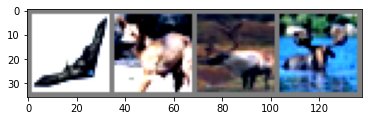

In [7]:
import display
# get some random training images
dataiter = iter(trainloader1)
#dataiter = iter(load_transform.trainloader_for_plot)
images, labels = dataiter.next()

# show images
display.imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

In [0]:
from Models import resnet

In [9]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = resnet.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14      

# Loss Function and optimization

In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.95, weight_decay=0.0001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

# train and test

In [0]:
import train 
import validation

In [12]:
losses = []
accuracies = []

epochs = 25
for epoch in range(1, epochs + 1):
    if epoch>10:
      scheduler.step()
    for param_group in optimizer.param_groups:
      print("lr= ",param_group['lr'])
    print(f'Epoch {epoch}:')
    train.train(net, trainloader, device, optimizer, criterion)
    validation.val(net, testloader, device, criterion, losses, accuracies)

  0%|          | 0/391 [00:00<?, ?it/s]

lr=  0.01
Epoch 1:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0087, Accuracy: 6169/10000 (61.69%)

lr=  0.01
Epoch 2:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 6902/10000 (69.02%)

lr=  0.01
Epoch 3:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0055, Accuracy: 7622/10000 (76.22%)

lr=  0.01
Epoch 4:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0044, Accuracy: 8038/10000 (80.38%)

lr=  0.01
Epoch 5:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0044, Accuracy: 8108/10000 (81.08%)

lr=  0.01
Epoch 6:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0044, Accuracy: 8194/10000 (81.94%)

lr=  0.01
Epoch 7:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8341/10000 (83.41%)

lr=  0.01
Epoch 8:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0037, Accuracy: 8497/10000 (84.97%)

lr=  0.01
Epoch 9:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8431/10000 (84.31%)

lr=  0.01
Epoch 10:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0039, Accuracy: 8507/10000 (85.07%)

lr=  0.01
Epoch 11:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0044, Accuracy: 8370/10000 (83.70%)

lr=  0.01
Epoch 12:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0042, Accuracy: 8474/10000 (84.74%)

lr=  0.01
Epoch 13:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0047, Accuracy: 8428/10000 (84.28%)

lr=  0.01
Epoch 14:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0041, Accuracy: 8550/10000 (85.50%)

lr=  0.01
Epoch 15:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0043, Accuracy: 8561/10000 (85.61%)

lr=  0.01
Epoch 16:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 8507/10000 (85.07%)

lr=  0.01
Epoch 17:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0049, Accuracy: 8454/10000 (84.54%)

lr=  0.01
Epoch 18:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0048, Accuracy: 8515/10000 (85.15%)

lr=  0.01
Epoch 19:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0046, Accuracy: 8607/10000 (86.07%)

lr=  0.005
Epoch 20:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0039, Accuracy: 8804/10000 (88.04%)

lr=  0.005
Epoch 21:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0038, Accuracy: 8859/10000 (88.59%)

lr=  0.005
Epoch 22:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0039, Accuracy: 8883/10000 (88.83%)

lr=  0.005
Epoch 23:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0039, Accuracy: 8890/10000 (88.90%)

lr=  0.005
Epoch 24:


  0%|          | 0/391 [00:00<?, ?it/s]


Validation set: Average loss: 0.0040, Accuracy: 8884/10000 (88.84%)

lr=  0.005
Epoch 25:


Loss=0.00 Batch ID=390 Accuracy=99.99: 100%|██████████| 391/391 [00:55<00:00,  6.99it/s]



Validation set: Average loss: 0.0040, Accuracy: 8880/10000 (88.80%)



# Plot Result

In [0]:
%matplotlib inline
import plot

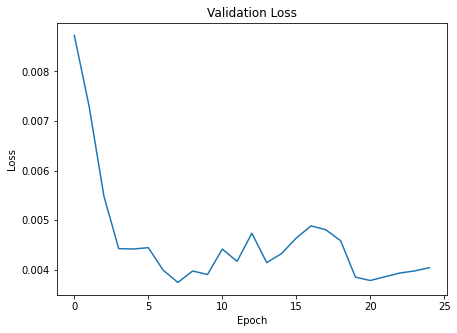

In [14]:
plot.plot_metric(losses, 'Loss')

# Plot Accuracy

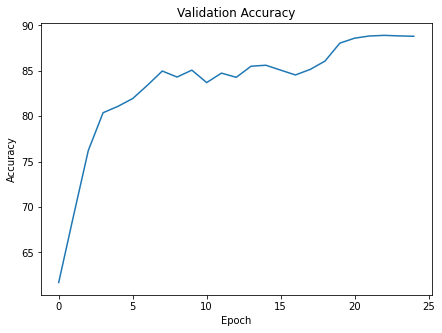

In [15]:
plot.plot_metric(accuracies, 'Accuracy')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    dog   dog  deer   dog


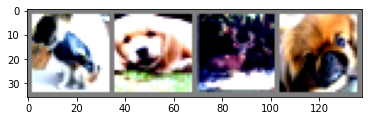

In [16]:
dataiter = iter(testloader1)
images, labels = dataiter.next()

display.imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
outputs = net(images.cuda())

In [18]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog   dog  deer   dog


# Result Analysis


In [19]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for _, (images, labels) in enumerate(testloader1, 0):
        images, labels = images.to(device), labels.to(device)

        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(len(labels)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 91 %
Accuracy of   car : 94 %
Accuracy of  bird : 85 %
Accuracy of   cat : 73 %
Accuracy of  deer : 88 %
Accuracy of   dog : 84 %
Accuracy of  frog : 91 %
Accuracy of horse : 93 %
Accuracy of  ship : 93 %
Accuracy of truck : 94 %


In [20]:
# get the image from the dataloader
testset =  data.getTrainDataSet(train=False)
testloader2 = data.getGradCamDataLoader(testset)
it = iter(testloader2)

Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ship


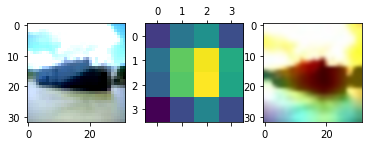

In [21]:
import gradcam
img,_ = next(it)
gradcam.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck


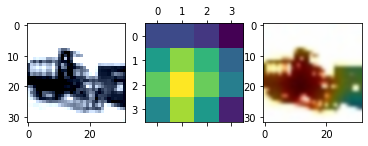

In [22]:
img,_ = next(it)
gradcam.gradcamof(net, img, classes)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


car


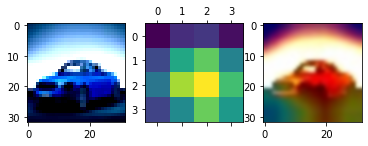

In [23]:
img,_ = next(it)
gradcam.gradcamof(net, img, classes)